# ADA Data Explotarion

### Variables

SOURCE_SUBREDDIT: the subreddit where the link originates

TARGET_SUBREDDIT: the subreddit where the link ends

POST_ID: the post in the source subreddit that starts the link

TIMESTAMP: time time of the post

POST_LABEL: label indicating if the source post is explicitly negative towards the target post. 

The value is -1 if the source is negative towards the target, and 1 if it is neutral or positive. 

The label is created using crowd-sourcing and training a text based classifier, and is better than simple sentiment analysis of the posts. Please see the reference paper for details.

POST_PROPERTIES: a vector representing the text properties of the source post, listed as a list of comma separated numbers. The vector elements are the following:

01. Number of characters
2. Number of characters without counting white space
3. Fraction of alphabetical characters
4. Fraction of digits
5. Fraction of uppercase characters
6. Fraction of white spaces
7. Fraction of special characters, such as comma, exclamation mark, etc.
8. Number of words
9. Number of unique works
10. Number of long words (at least 6 characters)
11. Average word length
12. Number of unique stopwords
13. Fraction of stopwords
14. Number of sentences
15. Number of long sentences (at least 10 words)
16. Average number of characters per sentence
17. Average number of words per sentence
18. Automated readability index
19. Positive sentiment calculated by VADER
20. Negative sentiment calculated by VADER
21. Compound sentiment calculated by VADER
22. LIWC_Funct
23. LIWC_Pronoun
24. LIWC_Ppron
25. LIWC_I
26. LIWC_We
27. LIWC_You
28. LIWC_SheHe
29. LIWC_They
30. LIWC_Ipron
31. LIWC_Article
32. LIWC_Verbs
33. LIWC_AuxVb
34. LIWC_Past
35. LIWC_Present
36. LIWC_Future
37. LIWC_Adverbs
38. LIWC_Prep
39. LIWC_Conj
40. LIWC_Negate
41. LIWC_Quant
42. LIWC_Numbers
43. LIWC_Swear
44. LIWC_Social
45. LIWC_Family
46. LIWC_Friends
47. LIWC_Humans
48. LIWC_Affect
49. LIWC_Posemo
50. LIWC_Negemo
51. LIWC_Anx
52. LIWC_Anger
53. LIWC_Sad
54. LIWC_CogMech
55. LIWC_Insight
56. LIWC_Cause
57. LIWC_Discrep
58. LIWC_Tentat
59. LIWC_Certain
60. LIWC_Inhib
61. LIWC_Incl
62. LIWC_Excl
63. LIWC_Percept
64. LIWC_See
65. LIWC_Hear
66. LIWC_Feel
67. LIWC_Bio
68. LIWC_Body
69. LIWC_Health
70. LIWC_Sexual
71. LIWC_Ingest
72. LIWC_Relativ
73. LIWC_Motion
74. LIWC_Space
75. LIWC_Time
76. LIWC_Work
77. LIWC_Achiev
78. LIWC_Leisure
79. LIWC_Home
80. LIWC_Money
81. LIWC_Relig
82. LIWC_Death
83. LIWC_Assent
84. LIWC_Dissent
85. LIWC_Nonflu
86. LIWC_Filler

LIWC - linguistic inquiry and word count (codebook: https://www.liwc.app/static/documents/LIWC-22%20Manual%20-%20Development%20and%20Psychometrics.pdf)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_columns", 100)

In [2]:
PATH = 'data/'
filename_titles = 'soc-redditHyperlinks-title.tsv'
filename_bodies = 'soc-redditHyperlinks-body.tsv'
df_title = pd.read_csv(PATH + filename_titles, sep="\t")
df_body = pd.read_csv(PATH + filename_bodies, sep="\t")

In [3]:
display(df_title.head())
display(df_body.head())

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,rddtgaming,rddtrust,1u4pzzs,2013-12-31 16:39:18,1,"25.0,23.0,0.76,0.0,0.44,0.12,0.12,4.0,4.0,0.0,..."
1,xboxone,battlefield_4,1u4tmfs,2013-12-31 17:59:11,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
2,ps4,battlefield_4,1u4tmos,2013-12-31 17:59:40,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
3,fitnesscirclejerk,leangains,1u50xfs,2013-12-31 19:01:56,1,"49.0,43.0,0.775510204082,0.0,0.265306122449,0...."
4,fitnesscirclejerk,lifeprotips,1u51nps,2013-12-31 21:02:28,1,"14.0,14.0,0.785714285714,0.0,0.428571428571,0...."


,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."


In [4]:

# Example: assume you already have df_body loaded
# df_body = pd.read_csv("soc-redditHyperlinks-body.tsv", sep="\t")

# Step 1. Create the list of column names for POST_PROPERTIES
post_props_cols = [
    "num_chars", "num_chars_no_space", "frac_alpha", "frac_digits",
    "frac_upper", "frac_spaces", "frac_special", "num_words",
    "num_unique_words", "num_long_words", "avg_word_length",
    "num_unique_stopwords", "frac_stopwords", "num_sentences",
    "num_long_sentences", "avg_chars_per_sentence", "avg_words_per_sentence",
    "readability_index", "sent_pos", "sent_neg", "sent_compound",
    "LIWC_Funct", "LIWC_Pronoun", "LIWC_Ppron", "LIWC_I", "LIWC_We",
    "LIWC_You", "LIWC_SheHe", "LIWC_They", "LIWC_Ipron", "LIWC_Article",
    "LIWC_Verbs", "LIWC_AuxVb", "LIWC_Past", "LIWC_Present", "LIWC_Future",
    "LIWC_Adverbs", "LIWC_Prep", "LIWC_Conj", "LIWC_Negate", "LIWC_Quant",
    "LIWC_Numbers", "LIWC_Swear", "LIWC_Social", "LIWC_Family",
    "LIWC_Friends", "LIWC_Humans", "LIWC_Affect", "LIWC_Posemo",
    "LIWC_Negemo", "LIWC_Anx", "LIWC_Anger", "LIWC_Sad", "LIWC_CogMech",
    "LIWC_Insight", "LIWC_Cause", "LIWC_Discrep", "LIWC_Tentat",
    "LIWC_Certain", "LIWC_Inhib", "LIWC_Incl", "LIWC_Excl", "LIWC_Percept",
    "LIWC_See", "LIWC_Hear", "LIWC_Feel", "LIWC_Bio", "LIWC_Body",
    "LIWC_Health", "LIWC_Sexual", "LIWC_Ingest", "LIWC_Relativ",
    "LIWC_Motion", "LIWC_Space", "LIWC_Time", "LIWC_Work", "LIWC_Achiev",
    "LIWC_Leisure", "LIWC_Home", "LIWC_Money", "LIWC_Relig", "LIWC_Death",
    "LIWC_Assent", "LIWC_Dissent", "LIWC_Nonflu", "LIWC_Filler"
]
col_to_split = "PROPERTIES"


def split_cols(df_to_split, col_name_to_split, new_col_names):
    if col_name_to_split in df_to_split.columns:
        df_to_split[new_col_names] = df_body[col_name_to_split].str.split(",", expand=True).astype(float)
        df_to_split.drop(columns=[col_name_to_split], inplace=True)

split_cols(df_title, col_to_split, post_props_cols)
split_cols(df_body, col_to_split, post_props_cols)

# Quick check
display(df_body.head(5))
display(df_title.head(5))


,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,num_chars,num_chars_no_space,frac_alpha,frac_digits,frac_upper,frac_spaces,frac_special,num_words,num_unique_words,num_long_words,avg_word_length,num_unique_stopwords,frac_stopwords,num_sentences,num_long_sentences,avg_chars_per_sentence,avg_words_per_sentence,readability_index,sent_pos,sent_neg,sent_compound,LIWC_Funct,LIWC_Pronoun,LIWC_Ppron,LIWC_I,LIWC_We,LIWC_You,LIWC_SheHe,LIWC_They,LIWC_Ipron,LIWC_Article,LIWC_Verbs,LIWC_AuxVb,LIWC_Past,LIWC_Present,LIWC_Future,LIWC_Adverbs,LIWC_Prep,LIWC_Conj,LIWC_Negate,LIWC_Quant,LIWC_Numbers,LIWC_Swear,LIWC_Social,LIWC_Family,LIWC_Friends,LIWC_Humans,LIWC_Affect,LIWC_Posemo,LIWC_Negemo,LIWC_Anx,LIWC_Anger,LIWC_Sad,LIWC_CogMech,LIWC_Insight,LIWC_Cause,LIWC_Discrep,LIWC_Tentat,LIWC_Certain,LIWC_Inhib,LIWC_Incl,LIWC_Excl,LIWC_Percept,LIWC_See,LIWC_Hear,LIWC_Feel,LIWC_Bio,LIWC_Body,LIWC_Health,LIWC_Sexual,LIWC_Ingest,LIWC_Relativ,LIWC_Motion,LIWC_Space,LIWC_Time,LIWC_Work,LIWC_Achiev,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,345.0,298.0,0.756522,0.017391,0.086957,0.150725,0.075362,57.0,53.0,10.0,4.789474,15.0,0.315789,1.0,1.0,345.000000,57.000000,35.577895,0.073,0.080,0.1748,0.344828,0.051724,0.034483,0.000000,0.034483,0.000000,0.000000,0.0,0.017241,0.051724,0.103448,0.051724,0.000000,0.103448,0.000000,0.034483,0.034483,0.068966,0.017241,0.034483,0.000000,0.0,0.103448,0.000000,0.0,0.000000,0.051724,0.017241,0.034483,0.000000,0.000000,0.017241,0.189655,0.034483,0.0,0.034483,0.034483,0.000000,0.000000,0.068966,0.051724,0.034483,0.034483,0.000000,0.0,0.017241,0.017241,0.0,0.0,0.0,0.068966,0.017241,0.051724,0.000000,0.051724,0.068966,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,101.0,98.0,0.742574,0.019802,0.049505,0.059406,0.178218,14.0,14.0,2.0,5.714286,1.0,0.071429,2.0,0.0,49.500000,7.000000,16.049286,0.472,0.000,0.5538,0.066667,0.066667,0.066667,0.066667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.133333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.0,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.066667,0.066667,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,85.0,85.0,0.752941,0.023529,0.082353,0.011765,0.211765,10.0,10.0,2.0,7.200000,0.0,0.000000,1.0,0.0,85.000000,10.000000,23.605000,0.000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.090909,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.090909,0.090909,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,1124.0,949.0,0.772242,0.001779,0.057829,0.179715,0.046263,191.0,125.0,34.0,4.623037,36.0,0.366492,15.0,9.0,73.200000,12.733333,12.654154,0.153,0.026,0.9672,0.526042,0.109375,0.041667,0.031250,0.000000,0.005208,0.010417,0.0,0.067708,0.057292,0.151042,0.098958,0.015625,0.083333,0.036458,0.052083,0.109375,0.052083,0.010417,0.046875,0.005208,0.0,0.067708,0.010417,0.0,0.000000,0.052083,0.041667,0.010417,0.010417,0.000000,0.000000,0.203125,0.046875,0.0,0.036458,0.046875,0.015625,0.005208,0.036458,0.031250,0.015625,0.010417,0.000000,0.0,0.005208,0.005208,0.0,0.0,0.0,0.104167,0.015625,0.052083,0.036458,0.026042,0.031250,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.005208
4,playmygame,gamede

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,num_chars,num_chars_no_space,frac_alpha,frac_digits,frac_upper,frac_spaces,frac_special,num_words,num_unique_words,num_long_words,avg_word_length,num_unique_stopwords,frac_stopwords,num_sentences,num_long_sentences,avg_chars_per_sentence,avg_words_per_sentence,readability_index,sent_pos,sent_neg,sent_compound,LIWC_Funct,LIWC_Pronoun,LIWC_Ppron,LIWC_I,LIWC_We,LIWC_You,LIWC_SheHe,LIWC_They,LIWC_Ipron,LIWC_Article,LIWC_Verbs,LIWC_AuxVb,LIWC_Past,LIWC_Present,LIWC_Future,LIWC_Adverbs,LIWC_Prep,LIWC_Conj,LIWC_Negate,LIWC_Quant,LIWC_Numbers,LIWC_Swear,LIWC_Social,LIWC_Family,LIWC_Friends,LIWC_Humans,LIWC_Affect,LIWC_Posemo,LIWC_Negemo,LIWC_Anx,LIWC_Anger,LIWC_Sad,LIWC_CogMech,LIWC_Insight,LIWC_Cause,LIWC_Discrep,LIWC_Tentat,LIWC_Certain,LIWC_Inhib,LIWC_Incl,LIWC_Excl,LIWC_Percept,LIWC_See,LIWC_Hear,LIWC_Feel,LIWC_Bio,LIWC_Body,LIWC_Health,LIWC_Sexual,LIWC_Ingest,LIWC_Relativ,LIWC_Motion,LIWC_Space,LIWC_Time,LIWC_Work,LIWC_Achiev,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler
0,rddtgaming,rddtrust,1u4pzzs,2013-12-31 16:39:18,1,345.0,298.0,0.756522,0.017391,0.086957,0.150725,0.075362,57.0,53.0,10.0,4.789474,15.0,0.315789,1.0,1.0,345.000000,57.000000,35.577895,0.073,0.080,0.1748,0.344828,0.051724,0.034483,0.000000,0.034483,0.000000,0.000000,0.0,0.017241,0.051724,0.103448,0.051724,0.000000,0.103448,0.000000,0.034483,0.034483,0.068966,0.017241,0.034483,0.000000,0.0,0.103448,0.000000,0.0,0.000000,0.051724,0.017241,0.034483,0.000000,0.000000,0.017241,0.189655,0.034483,0.0,0.034483,0.034483,0.000000,0.000000,0.068966,0.051724,0.034483,0.034483,0.000000,0.0,0.017241,0.017241,0.0,0.0,0.0,0.068966,0.017241,0.051724,0.000000,0.051724,0.068966,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,xboxone,battlefield_4,1u4tmfs,2013-12-31 17:59:11,1,101.0,98.0,0.742574,0.019802,0.049505,0.059406,0.178218,14.0,14.0,2.0,5.714286,1.0,0.071429,2.0,0.0,49.500000,7.000000,16.049286,0.472,0.000,0.5538,0.066667,0.066667,0.066667,0.066667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.133333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.0,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.066667,0.066667,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,ps4,battlefield_4,1u4tmos,2013-12-31 17:59:40,1,85.0,85.0,0.752941,0.023529,0.082353,0.011765,0.211765,10.0,10.0,2.0,7.200000,0.0,0.000000,1.0,0.0,85.000000,10.000000,23.605000,0.000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.090909,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.090909,0.090909,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,fitnesscirclejerk,leangains,1u50xfs,2013-12-31 19:01:56,1,1124.0,949.0,0.772242,0.001779,0.057829,0.179715,0.046263,191.0,125.0,34.0,4.623037,36.0,0.366492,15.0,9.0,73.200000,12.733333,12.654154,0.153,0.026,0.9672,0.526042,0.109375,0.041667,0.031250,0.000000,0.005208,0.010417,0.0,0.067708,0.057292,0.151042,0.098958,0.015625,0.083333,0.036458,0.052083,0.109375,0.052083,0.010417,0.046875,0.005208,0.0,0.067708,0.010417,0.0,0.000000,0.052083,0.041667,0.010417,0.010417,0.000000,0.000000,0.203125,0.046875,0.0,0.036458,0.046875,0.015625,0.005208,0.036458,0.031250,0.015625,0.010417,0.000000,0.0,0.005208,0.005208,0.0,0.0,0.0,0.104167,0.015625,0.052083,0.036458,0.026042,0.031250,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.005208
4,fitness

In [5]:
num_unique_subreddits = df_body["SOURCE_SUBREDDIT"].nunique()
print("Unique subreddits in body dataset:", num_unique_subreddits)


Unique subreddits in body dataset: 27863


In [6]:
filename_approved_countries = 'subreddit_matches_approved.csv'
approved_countries = pd.read_csv(PATH + filename_approved_countries)
approved_countries.head(5)


    


,subreddit,predicted_country,status
0,australia,Australia,approved
1,bitcoinfrance,France,approved
2,india,India,approved
3,canadaguns,Canada,approved
4,mauritius,Mauritius,approved


In [7]:
sentiment_distribution_title = {}
post_distribution_title = {}
for index, row in approved_countries.iterrows():
    country_name = row.predicted_country
    target_subreddit_name = row.subreddit
    sentiments_for_country_title = df_title.loc[df_title['TARGET_SUBREDDIT'] == target_subreddit_name, 'LINK_SENTIMENT']
    negative_post_count_title = (sentiments_for_country_title == -1).sum()
    post_count_title = len(sentiments_for_country_title)
    if post_count_title == 0:
        continue
    if country_name in sentiment_distribution_title:
        country_curr_sentiment = sentiment_distribution_title[country_name]
        post_count_curr = post_distribution_title[country_name]
        sentiment_distribution_title[country_name] = country_curr_sentiment - negative_post_count_title
        post_distribution_title[country_name] = post_count_curr + post_count_title
    else:
        sentiment_distribution_title[country_name] = -negative_post_count_title
        post_distribution_title[country_name] = post_count_title

for key, value in sentiment_distribution_title.items():
    normed_value = np.divide(value, post_distribution_title[key]) * (-1)
    sentiment_distribution_title[key] = normed_value * 100

In [8]:
sentiment_distribution_body = {}
post_distribution_body = {}
for index, row in approved_countries.iterrows():
    country_name = row.predicted_country
    target_subreddit_name = row.subreddit
    sentiments_for_country_body = df_body.loc[df_body['TARGET_SUBREDDIT'] == target_subreddit_name, 'LINK_SENTIMENT']
    negative_post_count_body = (sentiments_for_country_body == -1).sum()
    post_count_body = len(sentiments_for_country_body)
    if post_count_body == 0:
        continue
    if country_name in sentiment_distribution_body:
        country_curr_sentiment = sentiment_distribution_body[country_name]
        post_count_curr = post_distribution_body[country_name]
        sentiment_distribution_body[country_name] = country_curr_sentiment - negative_post_count_body
        post_distribution_body[country_name] = post_count_curr + post_count_body
    else:
        sentiment_distribution_body[country_name] = -negative_post_count_body
        post_distribution_body[country_name] = post_count_body

for key, value in sentiment_distribution_body.items():
    normed_value = np.divide(value, post_distribution_body[key]) * (-1)
    sentiment_distribution_body[key] = normed_value * 100

In [25]:
post_distribution_title_values = post_distribution_title.values()
avg_posts_title = sum(post_distribution_title_values) / len(post_distribution_title_values)
print(avg_posts_title)
countries_title = list(dict(sorted(sentiment_distribution_title.items(), key=lambda item: item[1])).keys())
sentiments_percentage_title = list(dict(sorted(sentiment_distribution_title.items(), key=lambda item: item[1])).values())
post_count_by_country_title = list(dict(sorted(post_distribution_title.items(), key=lambda item: item[1])).values())
total = len(countries_title)
threshold = 145

n_countries_title = [x for x in countries_title[total-n:total] if post_distribution_title[x] > threshold]
n_scores_title = []
n_post_count_title = []
for i in n_countries_title:
    n_post_count_title.append(post_distribution_title[i])
    n_scores_title.append(sentiment_distribution_title[i])

145.19834710743802


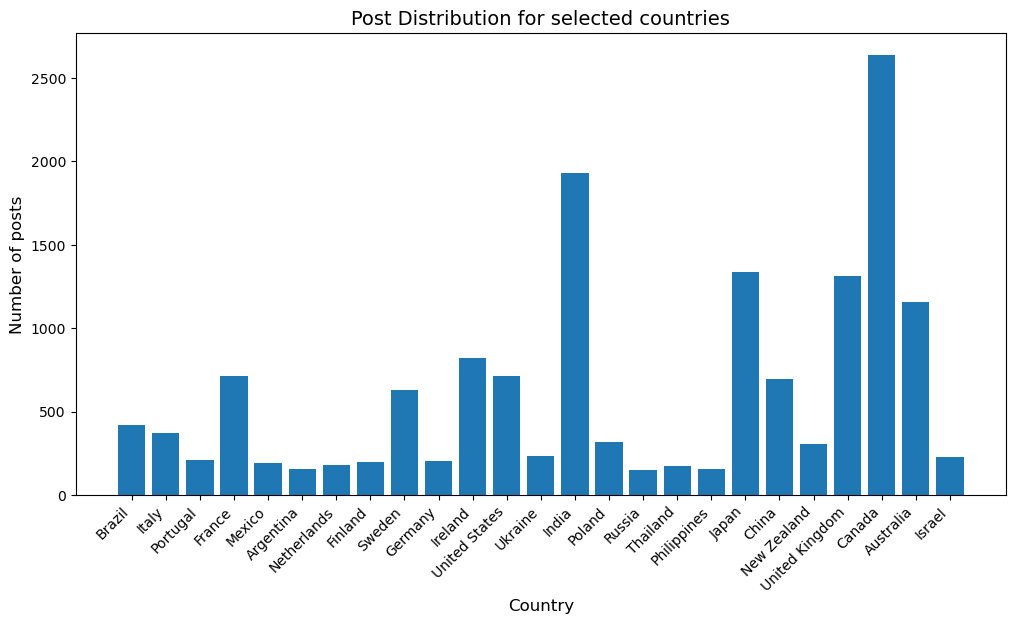

In [26]:


plt.figure(figsize=(12, 6))
plt.bar(n_countries_title, n_post_count_title)

plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of posts", fontsize=12)
plt.title("Post Distribution for selected countries", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

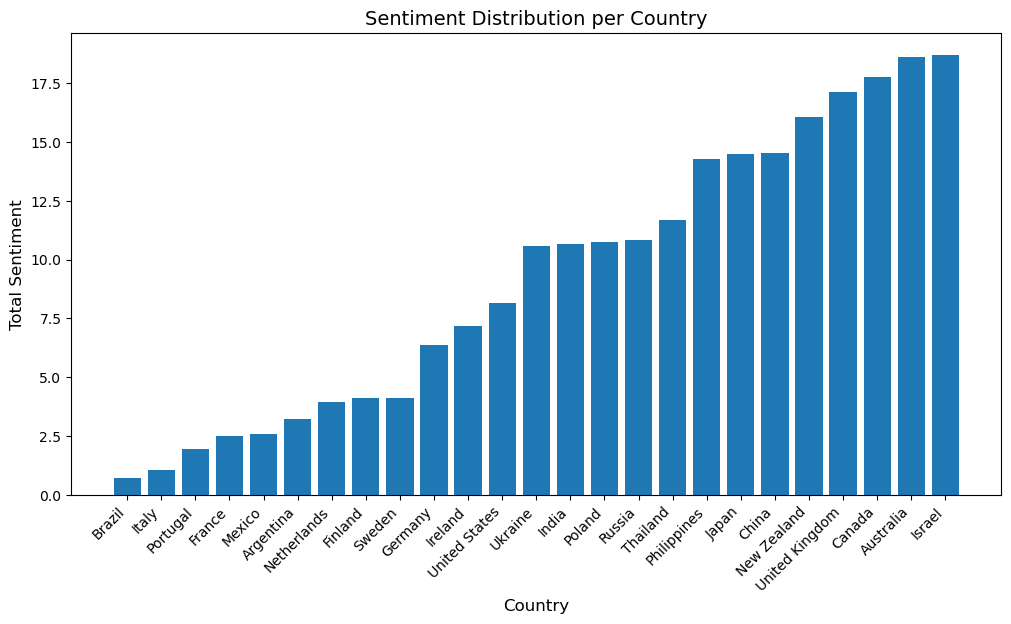

In [27]:
plt.figure(figsize=(12, 6))
plt.bar(n_countries_title, n_scores_title)


plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Sentiment", fontsize=12)
plt.title("Sentiment Distribution per Country", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
post_distribution_body_values = post_distribution_body.values()
avg_posts_body = sum(post_distribution_body_values) / len(post_distribution_body_values)
print(avg_posts_body)

53.171171171171174


In [29]:

countries_body = list(dict(sorted(sentiment_distribution_body.items(), key=lambda item: item[1])).keys())
sentiments_percentage_body = list(dict(sorted(sentiment_distribution_body.items(), key=lambda item: item[1])).values())
post_count_by_country_body = list(dict(sorted(post_distribution_body.items(), key=lambda item: item[1])).values())



total = len(countries_body)
threshold = 50
n_countries_body = [x for x in countries_body[total-n:total] if post_distribution_body[x] > threshold]

n_post_count_body = []
n_scores_body = []
for i in n_countries_body:
    n_post_count_body.append(post_distribution_body[i])
    n_scores_body.append(sentiment_distribution_body[i])

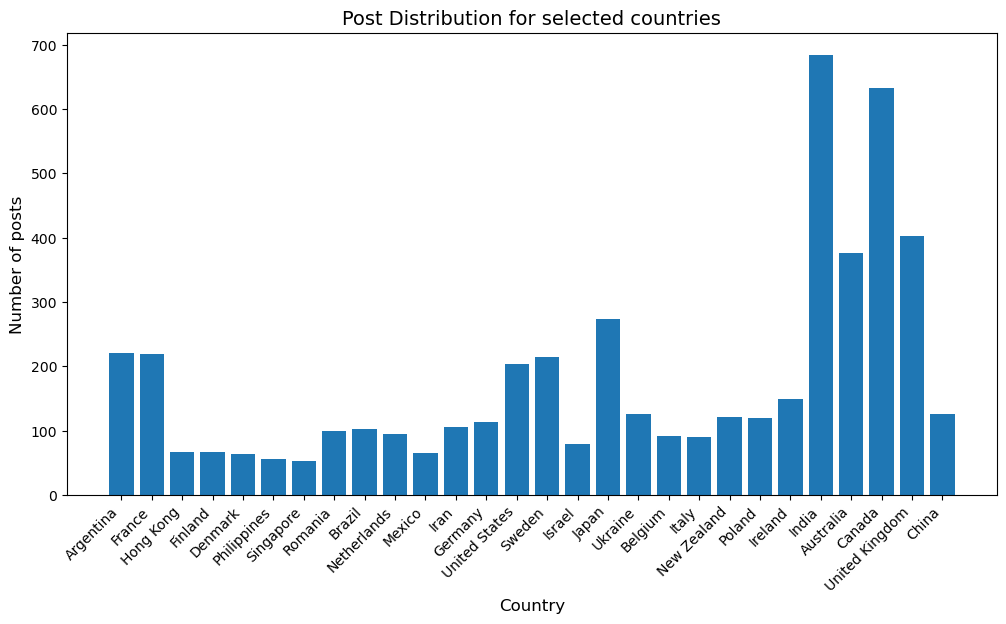

In [13]:


plt.figure(figsize=(12, 6))
plt.bar(n_countries_body, n_post_count_body)

plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of posts", fontsize=12)
plt.title("Post Distribution for selected countries", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

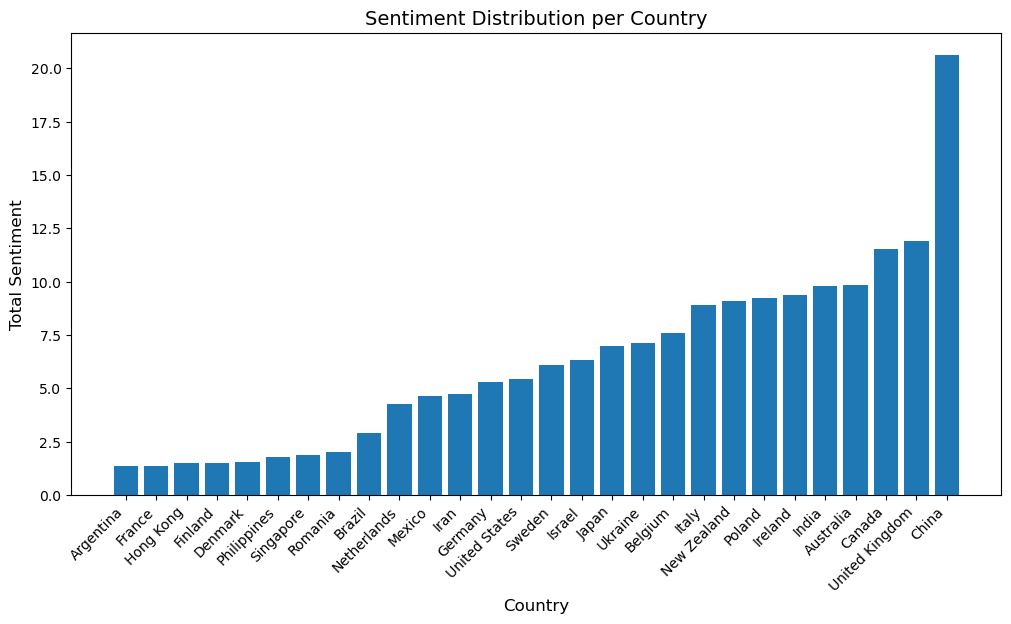

In [14]:
plt.figure(figsize=(12, 6))
plt.bar(n_countries_body, n_scores_body)

plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Sentiment", fontsize=12)
plt.title("Sentiment Distribution per Country", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()